In [300]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Необходимо провести RFM-анализ и сегментировать пользователей на когорты.

# Что такое RFM-анализ?

RFM-анализ — это метод сегментации клиентской базы по потребительскому поведению. Для этого используются три критерия оценки клиента:
- <b>R</b>ecenry - давность последней покупки
- <b>F</b>requency - частота покупок
- <b>M</b>onetary - сумма трат

Таким образом, пользователи сегментируются по RFM оценке - совокупности баллов R, F и M.

RFM-анализ позволяет разработать рекламную стратегию для каждой сегментированной группы, что упрощает подбор целевой аудитории для рекламной кампании. Оценка клиентской базы по данному принципу помогает минимизировать расходы на маркетинг и получать больше прибыли.

Пример RFM сегментации пользователей. В таблице указаны значения R, F и M показатели, ранжированные от 1 до 3.

<div align="center">
<table border="1" width="320" height="1" style='font-size: 12px;'>
<tr> <td bgcolor="#43e962">111</td> <td bgcolor="#fff49b">121</td> <td bgcolor="#fff49b">131</td> </tr>
<tr> <td bgcolor="#9eecc4">112</td> <td bgcolor="#9eecc4">122</td> <td bgcolor="#a7c8ed">132</td> </tr>
<tr> <td bgcolor="#9eecc4">113</td> <td bgcolor="#9eecc4">123</td> <td bgcolor="#a7c8ed">133</td> </tr>
<tr> <td bgcolor="#baa7ed">211</td> <td bgcolor="#baa7ed">221</td> <td bgcolor="#baa7ed">231</td> </tr>
<tr> <td bgcolor="#baa7ed">212</td> <td bgcolor="#baa7ed">222</td> <td bgcolor="#baa7ed">232</td> </tr>
<tr> <td bgcolor="#baa7ed">213</td> <td bgcolor="#baa7ed">223</td> <td bgcolor="#baa7ed">233</td> </tr>
<tr> <td bgcolor="#ffc9b4">311</td> <td bgcolor="#ffc9b4">321</td> <td bgcolor="#ffc9b4">331</td> </tr>
<tr> <td bgcolor="#ffc9b4">312</td> <td bgcolor="#ffc9b4">322</td> <td bgcolor="#ffc9b4">332</td> </tr>
<tr> <td bgcolor="#ffc9b4">313</td> <td bgcolor="#ffc9b4">323</td> <td bgcolor="lightgray">333</td> </tr>

</table>

<div align="left">
<table border="1" width="900" height="300" style='font-size: 12px;'>
<tr> <td bgcolor="#43e962">111</td> <td>«Ядро». Это стратегически важные клиенты. Они регулярно совершают покупки и пользуются услугами. Это те 20% покупателей, которые приносят 80% прибыли компании.</td> <td >Продемонстрировать заинтересованность со стороны компании: дать статус VIP, выдать персональную «золотую» карту, выразить личную благодарность в виде приятного комплимента/подарка, пригласить на корпоративное мероприятие. Скидки и бонусы не требуются.</td> </tr>
<tr> <td bgcolor="#9eecc4">*1*</td> <td>«Лояльные». Покупатели, которые тратят небольшие деньги, но при этом регулярно делают покупки.</td> <td >Подготовить программу лояльности, начислить бонусы, предложить подарок за покупку или достижение конкретного уровня чека.</td> </tr>
<tr> <td bgcolor="#fff49b">**1</td> <td>«Киты». Взаимодействуют с компанией нерегулярно, но при этом тратят большие суммы.</td> <td>Необходимо изучить потребности клиентов и предложить новинки из похожей категории, получить обратную связь о том, что хотели бы от компании. Таким клиентам не рекомендуется предлагать скидки.</td> </tr>
<tr> <td bgcolor="#a7c8ed">13*</td> <td>«Новички». При правильном взаимодействии могут стать постоянными клиентами.</td> <td>Этому сегменту нужно оказывать активную помощь в выборе товара, давать полезную информацию. Рекомендуется поздравлять с покупкой, отправлять приглашения в группы в соцсетях, предлагать акции. Цель — наладить крепкие взаимовыгодные отношения.</td> </tr>
<tr> <td bgcolor="#baa7ed">2**</td> <td>«Спящие». Это относится ко всему сегменту. Такие покупатели помнят о компании, когда-то совершали покупки, но сейчас перестали это делать.</td> <td >Компании необходимо напомнить о себе посредством рассылки, разработки стимулирующих акций, начисления бонусов на карту лояльности. Также можно направить небольшой опросный лист, чтобы получить обратную связь и узнать причину прекращения взаимодействия.</td> </tr>
<tr> <td bgcolor="#ffc9b4">33*</td> <td>«Уходящие». Когда-то были хорошими покупателями.</td> <td >Необходимо получить обратную связь, чтобы понять причину отказа от приобретения товаров и услуг. Можно начислить бонусы и предложить выгодную акцию. Таких покупателей можно вернуть и сделать постоянными клиентами.</td> </tr>
<tr> <td bgcolor="lightgray">333</td> <td>«Потерянные». Давно не взаимодействуют с компанией.</td> <td >Можно восстановить контакт с помощью рассылки или обзвона. Настаивать и тратить много времени/сил не рекомендуется.</td> </tr>
</table>

# Ознакомление с данными

In [453]:
file = 'online_retail_II.xlsx'

df = pd.read_excel(file, sheet_name=0, dtype={'Invoice': 'str'})  # , nrows = 1000
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


- InvoiceNo - Номер накладной. Если номер начинается с 'C', значит операция была отменена
- StockCode - Унакальный код товара
- Description - Имя товара
- Quantity - Кол-во товаров в сделке
- InvoiceDate - Дата сделки
- UnitPrice - Цена за штуку в стерлингах
- CustomerID - Индивидуальный номер покупателя
- Country - Страна

# EDA

In [454]:
df.dropna(inplace = True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')
#df['Invoice'].astype(str)
df = df[~df['Invoice'].str.contains('C', na=False)]  # Убрать отменённые сделки
df['Customer ID'].astype(int)
df = df[(df['Quantity'] > 0)]
df = df[(df['Price'] > 0)]

df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [325]:
# Число уникальных пользователей
df['Customer ID'].nunique()

4312

# RFM

In [303]:
df['days'] = (dt.datetime.now() - df['InvoiceDate']).dt.days  # Прошло дней с последней покупки
df['tot'] = df['Quantity'] * df['Price']
df['fraq'] = df['Invoice'].nunique()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,days,tot,fraq
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,5460,83.4,19213
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,5460,81.0,19213
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,5460,81.0,19213
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,5460,100.8,19213
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,5460,30.0,19213


Recenry:    Дней с последней покупки\
Frequency:    Кол-во покупок\
Monetary:    Потрачено денег

In [304]:
df["TotalPrice"] = df["Quantity"] * df["Price"]
df['days'] = (dt.datetime.now() - df['InvoiceDate']).dt.days  # Прошло дней с последней покупки

rfm = df.groupby('Customer ID', as_index = False).agg({'days': 'min',
                                                       'Invoice': lambda Invoice: Invoice.nunique(),
                                                       'TotalPrice': lambda TotalPrice: TotalPrice.sum()})
rfm.rename(columns={'days': 'Recenry', 'Invoice': 'Frequency', 'TotalPrice': 'Monetary'}, inplace = True)
rfm.head()

,Customer ID,Recenry,Frequency,Monetary
0,12346,5251,11,372.86
1,12347,5089,2,1323.32
2,12348,5160,1,222.16
3,12349,5129,3,2671.14
4,12351,5097,1,300.93


Text(0.5, 0, 'Потрачено денег')

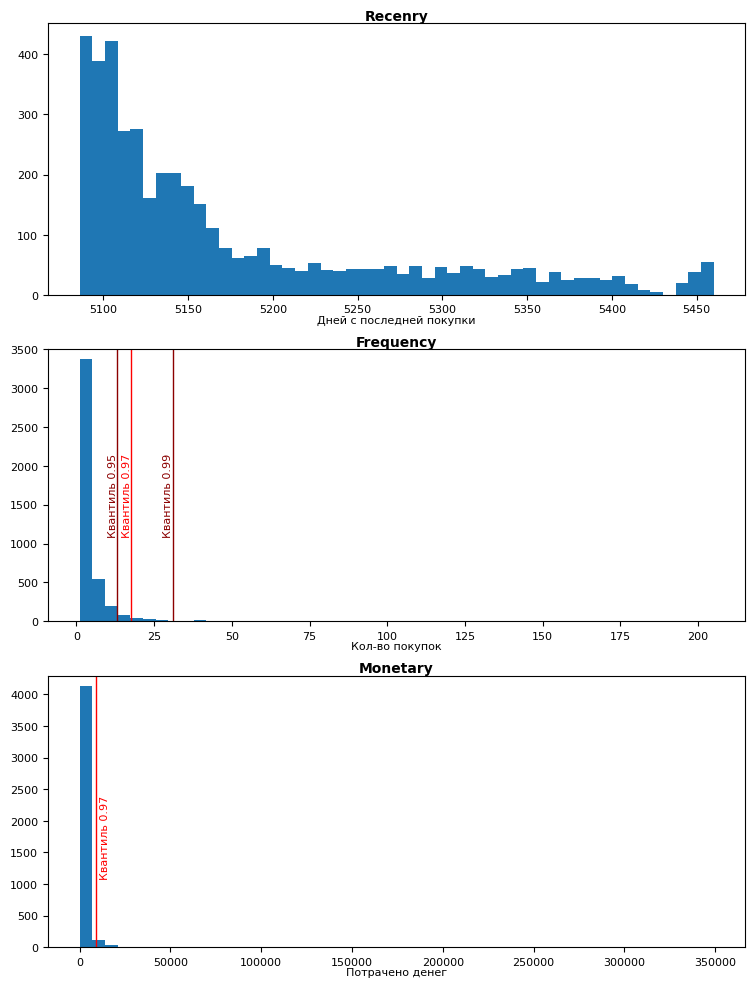

In [305]:
fig, ax = plt.subplots(3, 1, figsize=(9, 12))

# Recenry
ax[0].set_title('Recenry', fontdict={'fontsize': 10, 'fontweight': 'bold'}, pad=-1)
ax[0].hist(rfm.Recenry, bins=50)
ax[0].tick_params(labelsize=8)
ax[0].set_xlabel('Дней с последней покупки', fontsize=8, labelpad=0)

# Frequency
ax[1].set_title('Frequency', fontdict={'fontsize': 10, 'fontweight': 'bold'}, pad=-1)
ax[1].hist(rfm.Frequency, bins=50)
ax[1].tick_params(labelsize=8)
q_F_95 = rfm['Frequency'].quantile(0.95)
q_F_97 = rfm['Frequency'].quantile(0.97)
q_F_99 = rfm['Frequency'].quantile(0.99)
ax[1].vlines(q_F_95, 0, 3500, linewidth=1, color='darkred')
ax[1].text(q_F_95-3, 1100, s='Квантиль 0.95', color='darkred', size=8, rotation='vertical')
ax[1].vlines(q_F_97, 0, 3500, linewidth=1, color='red')
ax[1].text(q_F_97-3, 1100, s='Квантиль 0.97', color='red', size=8, rotation='vertical')
ax[1].vlines(q_F_99, 0, 3500, linewidth=1, color='darkred')
ax[1].text(q_F_99-3, 1100, s='Квантиль 0.99', color='darkred', size=8, rotation='vertical')
ax[1].set_ylim(bottom=0, top=3500)
ax[1].set_xlabel('Кол-во покупок', fontsize=8, labelpad=0)

# Monetary
ax[2].set_title('Monetary', fontdict={'fontsize': 10, 'fontweight': 'bold'}, pad=-1)
ax[2].hist(rfm.Monetary, bins=50)
ax[2].tick_params(labelsize=8)
q_M_97 = rfm['Monetary'].quantile(0.97)
ax[2].vlines(q_M_97, 0, 4300, linewidth=1, color='red')
ax[2].text(11000, 1100, s='Квантиль 0.97', color='red', size=8, rotation='vertical')
ax[2].set_ylim(bottom=0, top=4300)
ax[2].set_xlabel('Потрачено денег', fontsize=8, labelpad=0)

Гистограммы `Frequency` и `Monetary` имеют слишком большие "хвосты", что может привести к неправильному разбиению пользователей на сегменты. Такие хвости должны быть изключены из рассмотрения, а соответствующие им пользователи рассмотрены отдельно.

In [306]:
rfm = rfm[rfm['Frequency'] < q_F_97]
rfm = rfm[rfm['Monetary'] < q_M_97]

Text(0.5, 0, 'Потрачено денег')

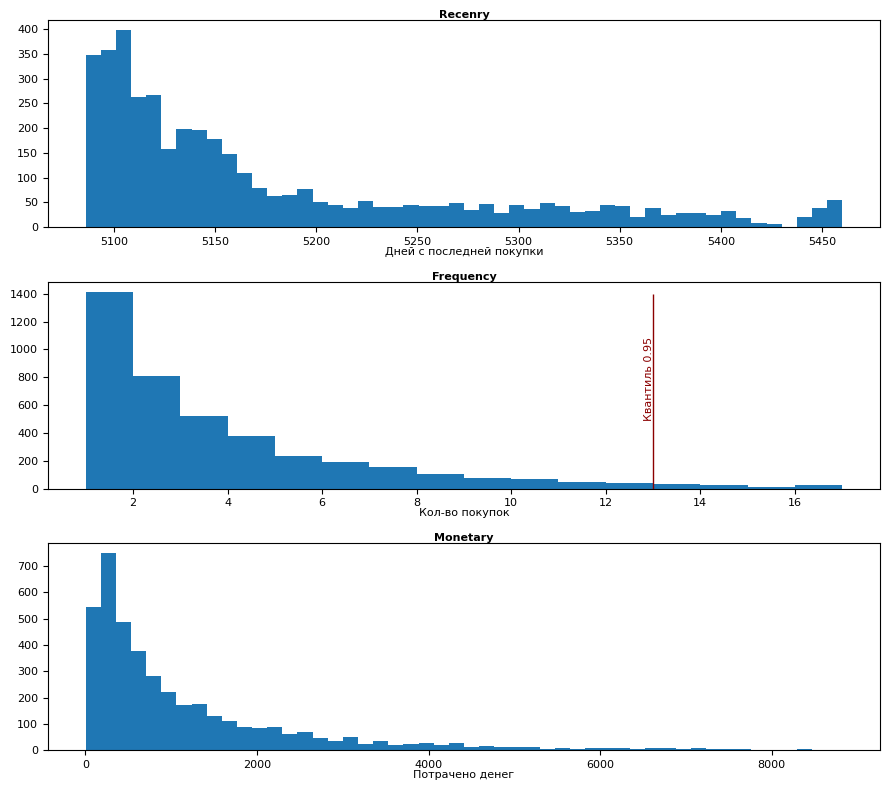

In [307]:
fig, ax = plt.subplots(3, 1, figsize=(9, 8), tight_layout=True)

ax[0].set_title('Recenry', fontdict={'fontsize': 8, 'fontweight': 'bold'}, pad=-1)
ax[0].hist(rfm.Recenry, bins=50)
ax[0].tick_params(labelsize=8)
ax[0].set_xlabel('Дней с последней покупки', fontsize=8, labelpad=0)

ax[1].set_title('Frequency', fontdict={'fontsize': 8, 'fontweight': 'bold'}, pad=-1)
ax[1].hist(rfm.Frequency, bins=rfm.Frequency.max()-1)
ax[1].tick_params(labelsize=8)
ax[1].set_xlabel('Кол-во покупок', fontsize=8, labelpad=0)
ax[1].vlines(q_F_95, 0, 1400, linewidth=1, color='darkred')
ax[1].text(q_F_95-0.2, 500, s='Квантиль 0.95', color='darkred', size=8, rotation='vertical')

ax[2].set_title('Monetary', fontdict={'fontsize': 8, 'fontweight': 'bold'}, pad=-1)
ax[2].hist(rfm.Monetary, bins=50)
ax[2].tick_params(labelsize=8)
ax[2].set_xlabel('Потрачено денег', fontsize=8, labelpad=0)

In [308]:
rfm

,Customer ID,Recenry,Frequency,Monetary
0,12346,5251,11,372.86
1,12347,5089,2,1323.32
2,12348,5160,1,222.16
3,12349,5129,3,2671.14
4,12351,5097,1,300.93
...,...,...,...,...
4307,18283,5104,6,641.77
4308,18284,5153,1,461.68
4309,18285,5382,1,427.00
4310,18286,5198,2,1296.43


Будем делить на группы с равным количеством элементов с помощью pandas qcut.

Ранжирование:\
1 - Отлично\
2 - Ок\
3 - Плохо\
\
R:    Дней с последней покупки. Чем меньше, чем лучше.\
F:    Кол-во покупок. Чем больше, тем лучше.\
M:    Потрачено денег. Чем больше, тем лучше.

In [309]:
rfm['R'] = pd.qcut(3 - rfm.Recenry, q=3, labels=[3, 2, 1])
rfm['F'] = pd.qcut(rfm.Frequency.rank(method="first"), q=3, labels=[3, 2, 1])
rfm['M'] = pd.qcut(rfm.Monetary, q=3, labels=[3, 2, 1])
rfm

,Customer ID,Recenry,Frequency,Monetary,R,F,M
0,12346,5251,11,372.86,3,1,3
1,12347,5089,2,1323.32,1,2,1
2,12348,5160,1,222.16,2,3,3
3,12349,5129,3,2671.14,2,2,1
4,12351,5097,1,300.93,1,3,3
...,...,...,...,...,...,...,...
4307,18283,5104,6,641.77,1,1,2
4308,18284,5153,1,461.68,2,2,2
4309,18285,5382,1,427.00,3,2,2
4310,18286,5198,2,1296.43,3,2,1


(2.95, 8821.550000000001)

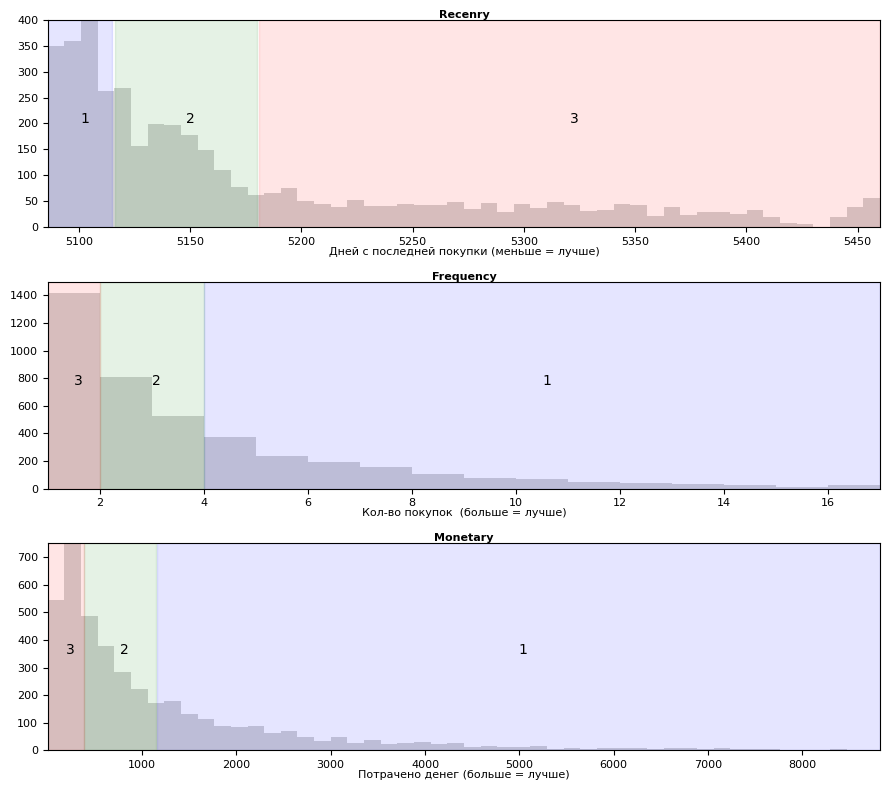

In [310]:
# Границы
r1 = (rfm.Recenry[rfm.R == 1].min(), rfm.Recenry[rfm.R == 1].max())
r2 = (rfm.Recenry[rfm.R == 2].min(), rfm.Recenry[rfm.R == 2].max())
r3 = (rfm.Recenry[rfm.R == 3].min(), rfm.Recenry[rfm.R == 3].max())

f1 = (rfm.Frequency[rfm.F == 1].min(), rfm.Frequency[rfm.F == 1].max())
f2 = (rfm.Frequency[rfm.F == 2].min()+1, rfm.Frequency[rfm.F == 2].max())
f3 = (rfm.Frequency[rfm.F == 3].min(), rfm.Frequency[rfm.F == 3].max()+1)

m1 = (rfm.Monetary[rfm.M == 1].min(), rfm.Monetary[rfm.M == 1].max())
m2 = (rfm.Monetary[rfm.M == 2].min(), rfm.Monetary[rfm.M == 2].max())
m3 = (rfm.Monetary[rfm.M == 3].min(), rfm.Monetary[rfm.M == 3].max())

fig, ax = plt.subplots(3, 1, figsize=(9, 8), tight_layout=True)

ax[0].set_title('Recenry', fontdict={'fontsize': 8, 'fontweight': 'bold'}, pad=-1)
ax[0].hist(rfm.Recenry, bins=50, color='lightgray')
ax[0].tick_params(labelsize=8)
ax[0].set_xlabel('Дней с последней покупки (меньше = лучше)', fontsize=8, labelpad=0)
ax[0].fill_betweenx((0, 400), r1[0], r1[1], alpha=0.1, color='blue')
ax[0].fill_betweenx((0, 400), r2[0], r2[1], alpha=0.1, color='green')
ax[0].fill_betweenx((0, 400), r3[0], r3[1], alpha=0.1, color='red')
ax[0].text(r1[0]+(r1[1]-r1[0])/2, 200, s='1')
ax[0].text(r2[0]+(r2[1]-r2[0])/2, 200, s='2')
ax[0].text(r3[0]+(r3[1]-r3[0])/2, 200, s='3')
ax[0].set_ylim(bottom=0, top=400)
ax[0].set_xlim(left=r1[0], right=r3[1])

ax[1].set_title('Frequency', fontdict={'fontsize': 8, 'fontweight': 'bold'}, pad=-1)
ax[1].hist(rfm.Frequency, bins=rfm.Frequency.max()-1, color='lightgray')
ax[1].tick_params(labelsize=8)
ax[1].set_xlabel('Кол-во покупок  (больше = лучше)', fontsize=8, labelpad=0)
ax[1].fill_betweenx((0, 1500), f1[0], f1[1], alpha=0.1, color='blue')
ax[1].fill_betweenx((0, 1500), f2[0], f2[1], alpha=0.1, color='green')
ax[1].fill_betweenx((0, 1500), f3[0], f3[1], alpha=0.1, color='red')
ax[1].text(f1[0]+(f1[1]-f1[0])/2, 750, s='1')
ax[1].text(f2[0]+(f2[1]-f2[0])/2, 750, s='2')
ax[1].text(f3[0]+(f3[1]-f3[0])/2, 750, s='3')
ax[1].set_ylim(bottom=0, top=1500)
ax[1].set_xlim(left=f3[0], right=f1[1])

ax[2].set_title('Monetary', fontdict={'fontsize': 8, 'fontweight': 'bold'}, pad=-1)
ax[2].hist(rfm.Monetary, bins=50, color='lightgray')
ax[2].tick_params(labelsize=8)
ax[2].set_xlabel('Потрачено денег (больше = лучше)', fontsize=8, labelpad=0)
ax[2].fill_betweenx((0, 750), m1[0], m1[1], alpha=0.1, color='blue')
ax[2].fill_betweenx((0, 750), m2[0], m2[1], alpha=0.1, color='green')
ax[2].fill_betweenx((0, 750), m3[0], m3[1], alpha=0.1, color='red')
ax[2].text(m1[0]+(m1[1]-m1[0])/2, 350, s='1')
ax[2].text(m2[0]+(m2[1]-m2[0])/2, 350, s='2')
ax[2].text(m3[0]+(m3[1]-m3[0])/2, 350, s='3')
ax[2].set_ylim(bottom=0, top=750)
ax[2].set_xlim(left=m3[0], right=m1[1])

In [311]:
rfm['RFM'] = (rfm.R.astype('str') + rfm.F.astype('str') + rfm.M.astype('str')).astype(int)
rfm.drop(['R', 'F', 'M'], axis=1, inplace=True)
rfm

,Customer ID,Recenry,Frequency,Monetary,RFM
0,12346,5251,11,372.86,313
1,12347,5089,2,1323.32,121
2,12348,5160,1,222.16,233
3,12349,5129,3,2671.14,221
4,12351,5097,1,300.93,133
...,...,...,...,...,...
4307,18283,5104,6,641.77,112
4308,18284,5153,1,461.68,222
4309,18285,5382,1,427.00,322
4310,18286,5198,2,1296.43,321


# Строим RFM таблицу

In [312]:
condlist = [rfm['RFM'] == 111,  # Ядро
            rfm['RFM'].isin([112, 122, 113, 123]),  # Лояльные
            rfm['RFM'].isin([121, 131]),  # Киты
            rfm['RFM'].isin([132, 133]),  # Новички
            rfm['RFM'].isin([211, 221, 231, 212, 222, 232, 213, 223, 233]),  # Спящие
            rfm['RFM'].isin([311, 321, 331, 312, 322, 332, 313, 323]),  # Уходящие
            rfm['RFM'] == (333)]  # Потерянные
choicelist = ['Ядро',
              'Лояльные',
              'Киты',
              'Новички',
              'Спящие',
              'Уходящие',
              'Потерянные']
rfm['Сегмент'] = np.select(condlist, choicelist, default='0')
rfm[['Customer ID', 'RFM', 'Сегмент']]

,Customer ID,RFM,Сегмент
0,12346,313,Уходящие
1,12347,121,Киты
2,12348,233,Спящие
3,12349,221,Спящие
4,12351,133,Новички
...,...,...,...
4307,18283,112,Лояльные
4308,18284,222,Спящие
4309,18285,322,Уходящие
4310,18286,321,Уходящие


В итоге получаем таблицу соответствия пользоваеля и его сегмента

In [332]:
tm = rfm.groupby('Сегмент', as_index = False).agg({'Customer ID': 'count'}).sort_values(by='Customer ID', ascending=False).reset_index(drop=True)
tm

,Сегмент,Customer ID
0,Спящие,1382
1,Уходящие,779
2,Ядро,630
3,Потерянные,598
4,Лояльные,462
5,Новички,204
6,Киты,74


In [368]:
tm['Colors'] = ['#baa7ed', '#ffc9b4', '#43e962', 'lightgray', '#9eecc4', '#a7c8ed', '#fff49b']
tm['Labels'] = tm['Сегмент'] + '\n' + tm['Customer ID'].astype(str)

(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

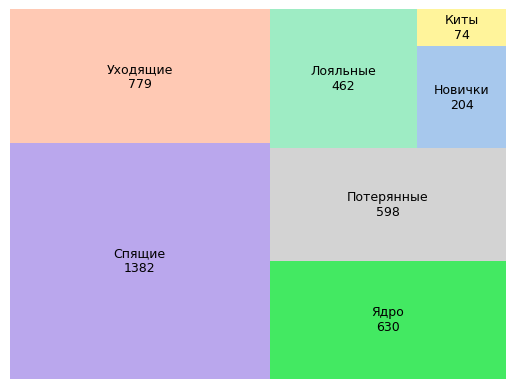

In [367]:
# Treemap (древовидная карта)
import squarify

squarify.plot(sizes=tm['Customer ID'], color=tm['Colors'], label=tm['Labels'],
              pad=0, text_kwargs={'fontsize': 9})
plt.axis('off')